In [1]:
import matplotlib
#matplotlib.use('SVG')
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from neurostim.opt_res_analysis import *

In [2]:
# format

# dimensions (A4:  8.27 x 11.69 inches)
text_frac = 0.8
abs_pw = 8.27 # pagewidth
abs_pl = 11.69 # pagelength
pw = text_frac * abs_pw
pl = text_frac * abs_pl

# others
dpi=600

In [3]:
# load datasets
# take L5 from simulations on 2.08.2022
raw_df = pd.read_hdf('../../../data/2023-02-27_newChRdistrib/all_data_man.hdf')
avrg_df = pd.DataFrame(avrg_angles(raw_df)['AP_count'])
df = find_xAPCs_over_light_pwrs(avrg_df, longform=False)
df_long = find_xAPCs_over_light_pwrs(avrg_df, longform=True)

In [4]:
# reduce df to relevant parameters
# select parameter set to plot:
light_model = 'foutz_et_al2012'
ChR_expr_lvl = 13e9
stim_duration = 200
diam = 200
NA = 0.22

stim_int_conv = 1000/(diam/1000/2)**2/np.pi

df_red = df.loc[:,light_model,:,ChR_expr_lvl,diam,NA,stim_duration]
df_red = df_red.reset_index().set_index(["hoc_file","chanrhod_distribution"])
#apply response_pattern = 1 (=central) if response peak offset is below 50um and if neuron responds
df_red['response_pattern'] = (df_red.x_APCmax<50) * (df_red.APCmax>0) * 1
df_red

/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


light_power  i_APCmax     x_APC50  \
hoc_file chanrhod_distribution                                              
L23      shemesh_supfig9b_exp_lin_yoff      0.00001       0.0         NaN   
         shemesh_supfig9b_exp_lin_yoff      0.00002       0.0         NaN   
         shemesh_supfig9b_exp_lin_yoff      0.00003       0.0         NaN   
         shemesh_supfig9b_exp_lin_yoff      0.00004       0.0         NaN   
         shemesh_supfig9b_exp_lin_yoff      0.00005       0.0         NaN   
...                                             ...       ...         ...   
L5       uniform                            0.40000      19.0  545.227273   
         uniform                            0.50000      19.0  554.969880   
         uniform                            0.60000      20.0  562.337662   
         uniform                            0.70000      20.0  568.309859   
         uniform                            0.80000      20.0  575.383436   

                                           x_APC10  APC_x0   APCmax  x_APCmax  \
hoc_file chanrhod_distribution                                                  
L23      shemesh_supfig9b_exp_lin_yoff         NaN     0.0   0.0000       0.0   
         shemesh_supfig9b_exp_lin_yoff         NaN     0.0   0.0000       0.0   
         shemesh_supfig9b_exp_lin_yoff         NaN     0.0   0.0000       0.0   
         shemesh_supfig9b_exp_lin_yoff         NaN     0.0   0.0000       0.0   
         shemesh_supfig9b_exp_lin_yoff         NaN     0.0   0.0000       0.0   
...                                            ...     ...      ...       ...   
L5       uniform                        581.666667     1.0  27.0000     475.0   
         uniform                        593.839286     1.0  27.3750     475.0   
         uniform                        598.235294     1.0  27.0000     500.0   
         uniform                        604.814815     1.0  28.0000     500.0   
         uniform                        612.134146     1.0  28.1875     500.0   

                                        response_pattern  
hoc_file chanrhod_distribution                            
L23      shemesh_supfig9b_exp_lin_yoff                 0  
         shemesh_supfig9b_exp_lin_yoff                 0  
         shemesh_supfig9b_exp_lin_yoff                 0  
         shemesh_supfig9b_exp_lin_yoff                 0  
         shemesh_supfig9b_exp_lin_yoff                 0  
...                                                  ...  
L5       uniform                                       0  
         uniform                                       0  
         uniform                                       0  
         uniform                                       0  
         uniform                                       0  

[266 rows x 8 columns]

In [5]:
xticks = np.append(arr=np.array([np.array([0.1]) * tick for tick in [1e-4, 1e-3, 1e-2]]).flatten(), values=1)
xticklabels = ['{:5.0e}'.format(tick*1000) if idx%1==0 else "" for idx, tick in enumerate(xticks)]
xticklabels = [str(tick*1000) if idx%1==0 else "" for idx, tick in enumerate(xticks)]

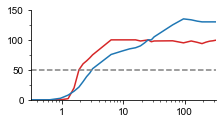

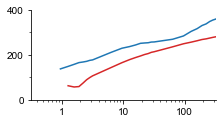

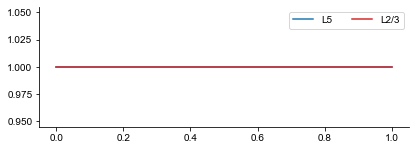

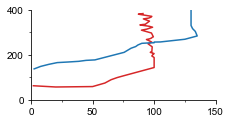

In [19]:
#
lp_APC10_L5  = 0.0001
lp_APC20_L5  = 0.0008
lp_APC10_L23 = 0.00006
lp_APC20_L23 = 0.0002

fig, ax1 = plt.subplots(figsize=(pw/2,pw/4))
dfplot = df_red.loc['L23','uniform']
ax1.plot(dfplot.light_power*stim_int_conv, dfplot.APCmax, label='L23', color='tab:red',lw=1.5, zorder=0)
#ax1.plot(dfplot.loc[dfplot.response_pattern==1].light_power, dfplot.loc[dfplot.response_pattern==1].APCmax, label='L23', color='tab:red',lw=3, zorder=0)
dfplot = df_red.loc['L5','uniform']
ax1.plot(dfplot.light_power*stim_int_conv, dfplot.APCmax, label='L5', color='tab:blue',lw=1.5, zorder=0)
#ax1.plot(dfplot.loc[dfplot.response_pattern==1].light_power, dfplot.loc[dfplot.response_pattern==1].APCmax, label='L5', color='tab:blue',lw=3, zorder=0)
ax1.set_xscale('log')
ax1.set_ylim(0,30)
xticks = [1,10,100]
xticklabels = ['1','10','100']
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_xlim(1e-5*stim_int_conv,1e-2*stim_int_conv)
ax1.set_yticks([0,10,20,30])
ax1.set_yticklabels(['0','50','100','150'])
ax1.set_yticks([5,15,25], minor=True)
#ax1.vlines(x=[lp_APC10_L23, lp_APC10_L5], ymin=0,ymax=10, color="gray", linestyle='dashed')
ax1.axhline(y=10, color="gray", linestyle='dashed',zorder=1)
#ax1.axhline(y=10, color="gray", linestyle='dashed',zorder=-1)
#ax1.vlines(x=[lp_APC20_L23, lp_APC20_L5], ymin=0,ymax=20, color="gray", linestyle='dashed')
#ax1.hlines(y=[20], xmin=0.00001,xmax=0.001, color="gray", linestyle='dashed',zorder=1)
#ax1.axhline(y=[20], color="gray", linestyle='dashed',zorder=-1)
#plt.vline(y=10, color='gray')
#ax1.grid()
#ax1.legend()
plt.savefig("presentationplots/pr_lp_ChRdens130"+'_compact'+".png", dpi=dpi,transparent=True, edgecolor='w',  
            bbox_inches='tight')
plt.show()

fig, ax1 = plt.subplots(figsize=(pw/2,pw/4))
dfplot = df_red.loc['L23','uniform']
ax1.plot(dfplot.light_power*stim_int_conv, dfplot.x_APC50, label='L23', color='tab:red',lw=1.5, zorder=0)
#ax1.plot(dfplot.loc[dfplot.response_pattern==1].light_power, dfplot.loc[dfplot.response_pattern==1].x_APC50, label='L23', color='tab:red',lw=3, zorder=0)
dfplot = df_red.loc['L5','uniform']
ax1.plot(dfplot.light_power*stim_int_conv, dfplot.x_APC50, label='L5', color='tab:blue',lw=1.5, zorder=0)
#ax1.plot(dfplot.loc[dfplot.response_pattern==1].light_power, dfplot.loc[dfplot.response_pattern==1].x_APC50, label='L5', color='tab:blue',lw=3, zorder=0)
ax1.set_xscale('log')
ax1.set_ylim(0,400)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_xlim(1e-5*stim_int_conv,1e-2*stim_int_conv)
ax1.set_yticks([0,200,400])
ax1.set_yticks([100,300], minor=True)
#ax1.vlines(x=[lp_APC10_L23, lp_APC10_L5], ymin=0,ymax=10, color="gray", linestyle='dashed')
#ax1.axhline(y=10, color="gray", linestyle='dashed',zorder=1)
#ax1.axhline(y=10, color="gray", linestyle='dashed',zorder=-1)
#ax1.vlines(x=[lp_APC20_L23, lp_APC20_L5], ymin=0,ymax=20, color="gray", linestyle='dashed')
#ax1.hlines(y=[20], xmin=0.00001,xmax=0.001, color="gray", linestyle='dashed',zorder=1)
#ax1.axhline(y=[20], color="gray", linestyle='dashed',zorder=-1)
#plt.vline(y=10, color='gray')
#ax1.grid()
#ax1.legend()
plt.savefig("presentationplots/rr_lp_ChRdens130"+'_compact'+".png", dpi=dpi,transparent=True, edgecolor='w',  
            bbox_inches='tight')
plt.show()

fig, ax5 = plt.subplots(figsize=(pw,pw/3))
ax5.plot([1,1], label='L5', color='tab:blue')
ax5.plot([1,1], label='L2/3', color='tab:red')
ax5.legend(ncol=2)
plt.savefig('plots/legend.png', dpi=dpi)


# response space constant vs peak response
fig, ax1 = plt.subplots(figsize=(pw/2,pw/4))
dfplot = df_red.loc['L23','uniform']
ax1.plot(dfplot.APCmax, dfplot.x_APC50, label='L23', color='tab:red',lw=1.5, zorder=0)
#ax1.plot(dfplot.loc[dfplot.response_pattern==1].light_power, dfplot.loc[dfplot.response_pattern==1].APCmax, label='L23', color='tab:red',lw=3, zorder=0)
dfplot = df_red.loc['L5','uniform']
ax1.plot(dfplot.APCmax, dfplot.x_APC50, label='L5', color='tab:blue',lw=1.5, zorder=0)
#ax1.plot(dfplot.loc[dfplot.response_pattern==1].light_power, dfplot.loc[dfplot.response_pattern==1].APCmax, label='L5', color='tab:blue',lw=3, zorder=0)
ax1.set_xlim(0,30)
ax1.set_xticks([0,10,20,30])
ax1.set_xticklabels(['0','50','100','150'])
ax1.set_xticks([5,15,25], minor=True)
ax1.set_ylim(0,400)
ax1.set_yticks([0,200,400])
ax1.set_yticks([100,300], minor=True)
#ax1.vlines(x=[lp_APC10_L23, lp_APC10_L5], ymin=0,ymax=10, color="gray", linestyle='dashed')
#ax1.axvline(x=10, color="gray", linestyle='dashed',zorder=1)
#ax1.axhline(y=10, color="gray", linestyle='dashed',zorder=-1)
#ax1.vlines(x=[lp_APC20_L23, lp_APC20_L5], ymin=0,ymax=20, color="gray", linestyle='dashed')
#ax1.hlines(y=[20], xmin=0.00001,xmax=0.001, color="gray", linestyle='dashed',zorder=1)
#ax1.axhline(y=[20], color="gray", linestyle='dashed',zorder=-1)
#plt.vline(y=10, color='gray')
#ax1.grid()
#ax1.legend()
plt.savefig("presentationplots/rsp_pr_ChRdens130"+'_compact'+".png", dpi=dpi,transparent=True, edgecolor='w',  
            bbox_inches='tight')
plt.show()

In [7]:
raw_df

AP_count  \
hoc_file light_model     chanrhod_distribution chanrhod_expression fiber_diameter fiber_NA stim_duration [ms] light_power radius [um] angle [rad]             
L5       foutz_et_al2012 uniform               13000000000         200.0          0.22     200.0              0.00008     0           0.000000            2   
                                                                                                                                      0.392699            2   
                                                                                                                                      0.785398            2   
                                                                                                                                      1.178097            2   
                                                                                                                                      1.570796            2   
...                                                                                                                                                     ...   
L23      foutz_et_al2012 uniform               13000000000         200.0          0.22     200.0              0.00090     975         4.319690            0   
                                                                                                                                      4.712389            0   
                                                                                                                                      5.105088            0   
                                                                                                                                      5.497787            0   
                                                                                                                                      5.890486            0   

                                                                                                                                                   firint_rate [Hz]  \
hoc_file light_model     chanrhod_distribution chanrhod_expression fiber_diameter fiber_NA stim_duration [ms] light_power radius [um] angle [rad]                     
L5       foutz_et_al2012 uniform               13000000000         200.0          0.22     200.0              0.00008     0           0.000000                 10.0   
                                                                                                                                      0.392699                 10.0   
                                                                                                                                      0.785398                 10.0   
                                                                                                                                      1.178097                 10.0   
                                                                                                                                      1.570796                 10.0   
...                                                                                                                                                             ...   
L23      foutz_et_al2012 uniform               13000000000         200.0          0.22     200.0              0.00090     975         4.319690                  0.0   
                                                                                                                                      4.712389                  0.0   
                                                                                                                                      5.105088                  0.0   
                                                                                                                                      5.497787                  0.0   
                                                                           

/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/ipykernel_launcher.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

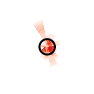

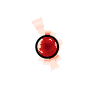

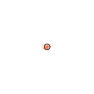

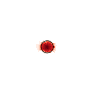

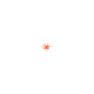

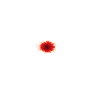

In [18]:
# response radii (read from plots manually)
L5_resp_rad_APC10 = 180
L23_resp_rad_APC10 = 59
L5_resp_rad_APC20 = 260
L23_resp_rad_APC20 = 140

from neurostim.polarmaps import simple_polar_map
import copy
light_model = 'foutz_et_al2012'
ChR_expr_lvl = 13e9
stim_duration = 200
diam = 200
NA = 0.22
chanrhod_distribution = 'uniform'

# select relevant data from data frame
L5_data = raw_df.loc['L5',light_model,chanrhod_distribution,
                      ChR_expr_lvl,diam, NA, stim_duration]
L23_data = raw_df.loc['L23',light_model,chanrhod_distribution,
                      ChR_expr_lvl,diam, NA, stim_duration]

# mask all values at 0 to be displayed white
L5_data.loc[L5_data.AP_count==0] = np.nan
L23_data.loc[L23_data.AP_count==0] = np.nan
cmap = copy.copy(matplotlib.cm.get_cmap('Reds'))
cmap.set_bad("white")

for lp,rr in zip([lp_APC10_L5, lp_APC20_L5], [L5_resp_rad_APC10, L5_resp_rad_APC20]):
    # L5
    fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                            wspace=0.05)
    ax = fig.add_subplot(gs[0,0], projection="polar")
    ax, mappable = simple_polar_map(
        data=L5_data.loc[lp].reset_index(),
        plot_col='AP_count',
        cmap= cmap,
        ax=ax,
        vmin=0,
        vmax=20)
    angles = np.linspace(0,2*np.pi,1000)
    ax.plot(angles,[rr]*len(angles), color='black', lw=2)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    ax.grid()
    fig.savefig('presentationplots/spatial_response_L5_'+str(lp)+'.svg', dpi=dpi, 
                facecolor='w', edgecolor='w',  
                bbox_inches='tight')
    plt.show()
for lp,rr in zip([lp_APC10_L23, lp_APC20_L23], [L23_resp_rad_APC10, L23_resp_rad_APC20]):
    # L23
    fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                            wspace=0.05)
    ax = fig.add_subplot(gs[0,0], projection="polar")
    ax, mappable = simple_polar_map(
        data=L23_data.loc[lp].reset_index(),
        plot_col='AP_count',
        cmap= cmap,
        ax=ax,
        vmin=0,
        vmax=20)
    angles = np.linspace(0,2*np.pi,1000)
    ax.plot(angles,[rr]*len(angles), color='black', lw=0.6)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    ax.grid()
    fig.savefig('presentationplots/spatial_response_L23_'+str(lp)+'.png', dpi=dpi, 
                facecolor='w', edgecolor='w',  
                bbox_inches='tight')
    plt.show()
for lp,rr in zip([lp_APC10_L23, lp_APC20_L23], [L23_resp_rad_APC10, L23_resp_rad_APC20]):
    # L23
    fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                            wspace=0.05)
    ax = fig.add_subplot(gs[0,0], projection="polar")
    ax, mappable = simple_polar_map(
        data=L23_data.loc[lp].reset_index(),
        plot_col='AP_count',
        cmap= cmap,
        ax=ax,
        vmin=0,
        vmax=20)
    angles = np.linspace(0,2*np.pi,1000)
    #ax.plot(angles,[rr]*len(angles), color='black', lw=2)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    ax.grid()
    fig.savefig('presentationplots/spatial_response_L23_wo_rsp'+str(lp)+'.png', dpi=dpi, 
                facecolor='w', edgecolor='w',  
                bbox_inches='tight')
    plt.show()

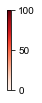

In [9]:
fig, cax = plt.subplots(figsize=(pw/90,pw/4.5))
ticks = [0,10,20]
ticks_labels_Hz = [str(int(tick)) for tick in np.array(ticks)/0.2]
cbar = plt.colorbar(mappable, cax=cax, ticks=ticks)
cbar.set_ticklabels(ticks_labels_Hz)
fig.savefig('presentationplots/colorbar.png', dpi=dpi, 
            facecolor='w', edgecolor='w',  
            bbox_inches='tight')
plt.show()


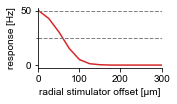

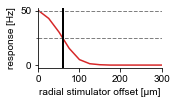

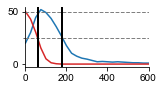

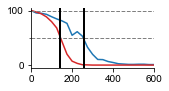

In [15]:
# lineplots of response decay over lateral distance

avrg_df
# select relevant data from data frame
L5_data = avrg_df.loc['L5',light_model,chanrhod_distribution,
                      ChR_expr_lvl,diam, NA, stim_duration]
L23_data = avrg_df.loc['L23',light_model,chanrhod_distribution,
                      ChR_expr_lvl,diam, NA, stim_duration]
fig, ax = plt.subplots(figsize=(pw/3,pw/6))
ax.plot(L23_data.loc[lp_APC10_L23].reset_index()['radius [um]'],L23_data.loc[lp_APC10_L23].reset_index()['AP_count'], color='tab:red')
ax.set_xlim(0,300)
ax.set_yticks([0,10])
ax.set_yticklabels([0,50])
ax.set_yticks([5], minor=True)
ax.set_xlabel('radial stimulator offset [µm]')
ax.set_ylabel('response [Hz]')
ax.axhline(y=5,linestyle='dashed', color='gray', lw=1)
ax.axhline(y=10,linestyle='dashed', color='gray', lw=1)
#ax.axvline(x=L23_resp_rad_APC10, color='black', lw=2)
fig.savefig('presentationplots/lineplot_10spikes_L23.png', dpi=dpi, 
            facecolor='w', edgecolor='w',  
            bbox_inches='tight')

fig, ax = plt.subplots(figsize=(pw/3,pw/6))
ax.plot(L23_data.loc[lp_APC10_L23].reset_index()['radius [um]'],L23_data.loc[lp_APC10_L23].reset_index()['AP_count'], color='tab:red')
ax.set_xlim(0,300)
ax.set_yticks([0,10])
ax.set_yticklabels([0,50])
ax.set_yticks([5], minor=True)
ax.set_xlabel('radial stimulator offset [µm]')
ax.set_ylabel('response [Hz]')
ax.axhline(y=5,linestyle='dashed', color='gray', lw=1)
ax.axhline(y=10,linestyle='dashed', color='gray', lw=1)
ax.axvline(x=L23_resp_rad_APC10, color='black', lw=2)
fig.savefig('presentationplots/lineplot_10spikes_L23_with_rsp.png', dpi=dpi, 
            facecolor='w', edgecolor='w',  
            bbox_inches='tight')


fig, ax = plt.subplots(figsize=(pw/3,pw/6))
ax.plot(L5_data.loc[lp_APC10_L5].reset_index()['radius [um]'],L5_data.loc[lp_APC10_L5].reset_index()['AP_count'], color='tab:blue')
ax.plot(L23_data.loc[lp_APC10_L23].reset_index()['radius [um]'],L23_data.loc[lp_APC10_L23].reset_index()['AP_count'], color='tab:red')
ax.set_xlim(0,600)
ax.set_yticks([0,10])
ax.set_yticklabels([0,50])
ax.set_yticks([5], minor=True)
ax.axhline(y=5,linestyle='dashed', color='gray', lw=1)
ax.axhline(y=10,linestyle='dashed', color='gray', lw=1)
ax.axvline(x=L5_resp_rad_APC10, color='black', lw=2)
ax.axvline(x=L23_resp_rad_APC10, color='black', lw=2)
fig.savefig('presentationplots/lineplot_10spikes.png', dpi=dpi, 
            facecolor='w', edgecolor='w',  
            bbox_inches='tight')
fig, ax = plt.subplots(figsize=(pw/3,pw/6))
ax.plot(L5_data.loc[lp_APC20_L5].reset_index()['radius [um]'],L5_data.loc[lp_APC20_L5].reset_index()['AP_count'], color='tab:blue')
ax.plot(L23_data.loc[lp_APC20_L23].reset_index()['radius [um]'],L23_data.loc[lp_APC20_L23].reset_index()['AP_count'], color='tab:red')
ax.set_xlim(0,600)
ax.set_yticks([0,20])
ax.set_yticklabels([0,100])
ax.set_yticks([10],minor=True)
ax.axhline(y=10,linestyle='dashed', color='gray', lw=1)
ax.axhline(y=20,linestyle='dashed', color='gray', lw=1)
ax.axvline(x=L5_resp_rad_APC20, color='black', lw=2)
ax.axvline(x=L23_resp_rad_APC20, color='black', lw=2)
fig.savefig('presentationplots/lineplot_20spikes.png', dpi=dpi, 
            facecolor='w', edgecolor='w',  
            bbox_inches='tight')

In [11]:
L23_data.loc[lp_APC10_L23]

,AP_count
radius [um],
0,10.0000
25,8.5625
50,6.0625
75,3.0625
100,1.0000
125,0.2500
150,0.0625
175,0.0000
200,0.0000


In [12]:
def lin_interp(a,aval,b,bval, goal):
    m = (bval-aval)/(b-a)
    return m * (goal-a) + aval
# L5 10 spikes
# radius  APC
# 175     5.375
# 200     3.5
print("L5  response radius 10 spikes is",lin_interp(a=5.375,aval=175,b=3.5,bval=200,goal=5))
# L2/3 10 spikes
# radius  APC
#50 	6.0625
#75 	3.0625
print("L23  response radius 10 spikes is",lin_interp(a=6.0625,aval=50,b=3.0625,bval=75,goal=5))
# L5 20 spikes
# radius APC
#225 	12.2500
#250 	10.6250
print("L5  response radius 20 spikes is",lin_interp(a=12.25,aval=225,b=10.625,bval=250,goal=10))
# L2/3 20 spikes
# radius  APC
#125 	13.6250
#150 	8.7500
print("L23  response radius 20 spikes is",lin_interp(a=13.645,aval=125,b=8.75,bval=150,goal=10))

L5  response radius 10 spikes is 180.0
L23  response radius 10 spikes is 58.85416666666667
L5  response radius 20 spikes is 259.61538461538464
L23  response radius 20 spikes is 143.6159346271706
